Pedro Biain Alvarez 
uc2024170406@student.uc.pt

Dario Jose Iglesisas



In [2]:
import pandas as pd

# Carga las bases de datos de población y coordenadas
poblacion_df = pd.read_excel("poblacion.xlsx")  # Base de datos de población
poblacion_df = poblacion_df.iloc[6:].reset_index(drop=True)
poblacion_df = poblacion_df[1:]
poblacion_df.columns = ['Provincia','Total','Española','Extranjera']
poblacion_df = poblacion_df.iloc[:-8]
poblacion_df.tail()
#print(len(poblacion_df))





c:\Users\bykon\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Provincia,Total,Española,Extranjera
46,46 Valencia/València,2656841,2306155,350686
47,47 Valladolid,521333,487981,33352
48,48 Bizkaia,1153282,1054185,99097
49,49 Zamora,166927,159326,7601
50,50 Zaragoza,979365,846939,132426


In [3]:
provincias_nuevas = [
    'Álava', 'Albacete', 'Alicante', 'Almería', 'Asturias', 'Ávila', 'Badajoz', 'Barcelona',
    'Burgos', 'Cáceres', 'Cádiz', 'Cantabria', 'Castellón', 'Ciudad Real', 'Córdoba', 'Cuenca','Coruña, A',
    'Gerona', 'Granada', 'Guadalajara', 'Gipuzkoa', 'Huelva', 'Huesca', 'Islas Baleares', 'Jaén', 
    'La Rioja', 'Las Palmas', 'León', 'Lleida', 'Lugo', 'Madrid', 'Málaga', 'Murcia',
    'Navarra', 'Ourense', 'Palencia', 'Pontevedra', 'Salamanca', 'Segovia', 'Sevilla', 'Soria',
    'Tarragona', 'Santa Cruz de Tenerife', 'Teruel', 'Toledo', 'Valencia', 'Valladolid', 'Vizcaya', 'Zamora', 'Zaragoza'
]

# Reemplazar los valores de la columna 'provincia' con la lista de provincias
poblacion_df['Provincia'] = provincias_nuevas
poblacion_df.head(5)

,Provincia,Total,Española,Extranjera
1,Álava,336308,301302,35006
2,Albacete,387529,356856,30673
3,Alicante,1955268,1518766,436502
4,Almería,753364,583918,169446
5,Asturias,159764,146896,12868


In [4]:
df_provincias = pd.read_csv("provincias_actualizado.csv")  # Base de datos de coordenadas
df_provincias = df_provincias.iloc[:,:-3]
df_provincias.head(5)




,Provincia,Latitud,Longitud
0,Álava,42.8500,-2.6725
1,Albacete,38.9940,-1.8585
2,Alicante,38.3452,-0.4810
3,Almería,36.8340,-2.4637
4,Asturias,43.3610,-5.8494


In [5]:
provincias_nuevas = [
    'Álava', 'Albacete', 'Alicante', 'Almería', 'Asturias', 'Ávila', 'Badajoz', 'Barcelona',
    'Burgos', 'Cáceres', 'Cádiz', 'Cantabria', 'Castellón', 'Ciudad Real', 'Córdoba', 'Cuenca','Coruña, A',
    'Gerona', 'Granada', 'Guadalajara', 'Gipuzkoa', 'Huelva', 'Huesca', 'Islas Baleares', 'Jaén', 
    'La Rioja', 'Las Palmas', 'León', 'Lleida', 'Lugo', 'Madrid', 'Málaga', 'Murcia',
    'Navarra', 'Ourense', 'Palencia', 'Pontevedra', 'Salamanca', 'Segovia', 'Sevilla', 'Soria',
    'Tarragona', 'Santa Cruz de Tenerife', 'Teruel', 'Toledo', 'Valencia', 'Valladolid', 'Vizcaya', 'Zamora', 'Zaragoza'
]

# Reemplazar los valores de la columna 'provincia' con la lista de provincias
df_provincias['Provincia'] = provincias_nuevas
df_provincias.head(5)

,Provincia,Latitud,Longitud
0,Álava,42.8500,-2.6725
1,Albacete,38.9940,-1.8585
2,Alicante,38.3452,-0.4810
3,Almería,36.8340,-2.4637
4,Asturias,43.3610,-5.8494


In [6]:
# Cruza ambas bases de datos en función de un campo común, como el nombre del municipio o código del INE
datos_mapeo = pd.merge(poblacion_df, df_provincias, on="Provincia")  # Ajusta el nombre de la columna de cruce
datos_mapeo.head(5)
datos_mapeo.to_csv('datos_mapeo.csv', index=False)

### Primera Visualizacion


TypeError: Image data of dtype object cannot be converted to float

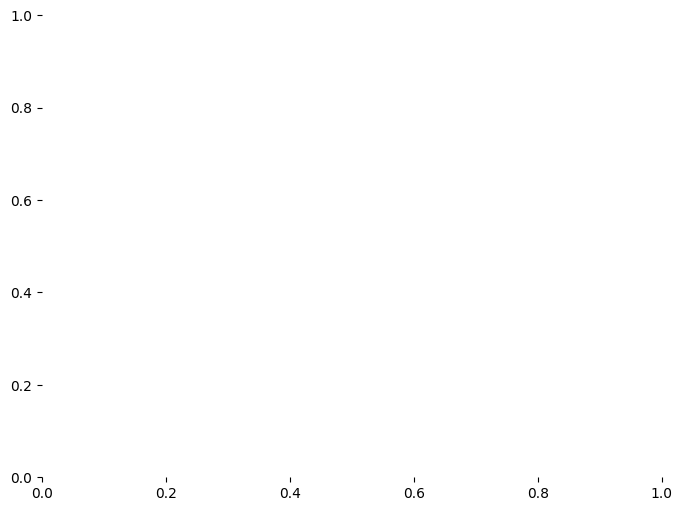

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ejemplo de datos
df = datos_mapeo

# Normalización de datos (opcional)
df["% Nativa"] = df["Española"] / df["Total"]
df["% Extranjera"] = df["Extranjera"] / df["Total"]

# Crear matriz para el heatmap
heatmap_data = df[["% Nativa", "% Extranjera"]].T
heatmap_data.columns = df["Provincia"]

# Crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", cbar_kws={'label': 'Proporción'})
plt.title("Distribución de Población por Provincia")
plt.ylabel("Categoría de Población")
plt.xlabel("Provincia")
plt.show()


### Segunda Visualizacion

In [10]:
import plotly.express as px
import pandas as pd

# Datos de ejemplo
df = datos_mapeo

# Crear columna de proporción de extranjeros
df["Proporcion Extranjera"] = df["Extranjera"] / (df['Total'])

# Crear mapa interactivo
fig = px.scatter_mapbox(
    df,
    lat="Latitud",
    lon="Longitud",
    size="Extranjera",
    color="Proporcion Extranjera",
    hover_name="Provincia",
    hover_data={"Española": True, "Extranjera": True},
    color_continuous_scale=px.colors.sequential.Viridis,
    size_max=15,
    zoom=6,
    mapbox_style="carto-positron"  # Puedes cambiar el estilo del mapa
)

fig.update_layout(title="Distribución de Población Nativa y Extranjera")
fig.show()


In [9]:
df["Extranjera"] = pd.to_numeric(df["Extranjera"], errors="coerce")
